In [ ]:
# Install packages needed
install.packages("magrittr")
install.packages("tidyr")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("lmtest")

In [2]:
# Use packages needed
library("magrittr")
library("tidyr")
library("dplyr")
library("ggplot2")
library("lmtest")


Attaching package: ‘tidyr’


The following object is masked from ‘package:magrittr’:

    extract



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [3]:
minerals = read.csv('../Data/minerals.csv')

In [4]:
head(minerals)

,Antimony,Gold
,<dbl>,<int>
1,3.08,1
2,6.15,1
3,2.35,1
4,0.30,0
5,0.30,0
6,9.62,1


In [5]:
colnames(minerals)[1] <- "Antimony"

# Test for appropriate sample size

# Test for Logit Linearity

In [6]:
myLogit = glm(Gold ~ Antimony, data = minerals, family = binomial)
summary(myLogit)



Call:
glm(formula = Gold ~ Antimony, family = binomial, data = minerals)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1918  -0.5462  -0.4471   0.2447   1.9748  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.5184     0.5958  -4.227 2.37e-05 ***
Antimony      1.7606     0.4883   3.606 0.000311 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 87.720  on 63  degrees of freedom
Residual deviance: 45.332  on 62  degrees of freedom
AIC: 49.332

Number of Fisher Scoring iterations: 7


In [7]:
probabilities <- predict(myLogit, type = "response")
predicted.classses <- ifelse(probabilities > .05, "pos", "neg")

In [8]:
minerals2 <- minerals
minerals2$prediction <- round(probabilities)
table(minerals2$prediction, minerals2$Gold)

   
     0  1
  0 34  8
  1  2 20

In [9]:
# all numeric already
minerals1 <- minerals %>% dplyr::select_if(is.numeric)

In [10]:
predictors = colnames(minerals1)

In [11]:
minerals1 <- minerals1 %>% mutate(logit=log(probabilities/(1-probabilities))) %>% gather(key="predictors", value="predictor.value", -logit)


`geom_smooth()` using formula 'y ~ x'



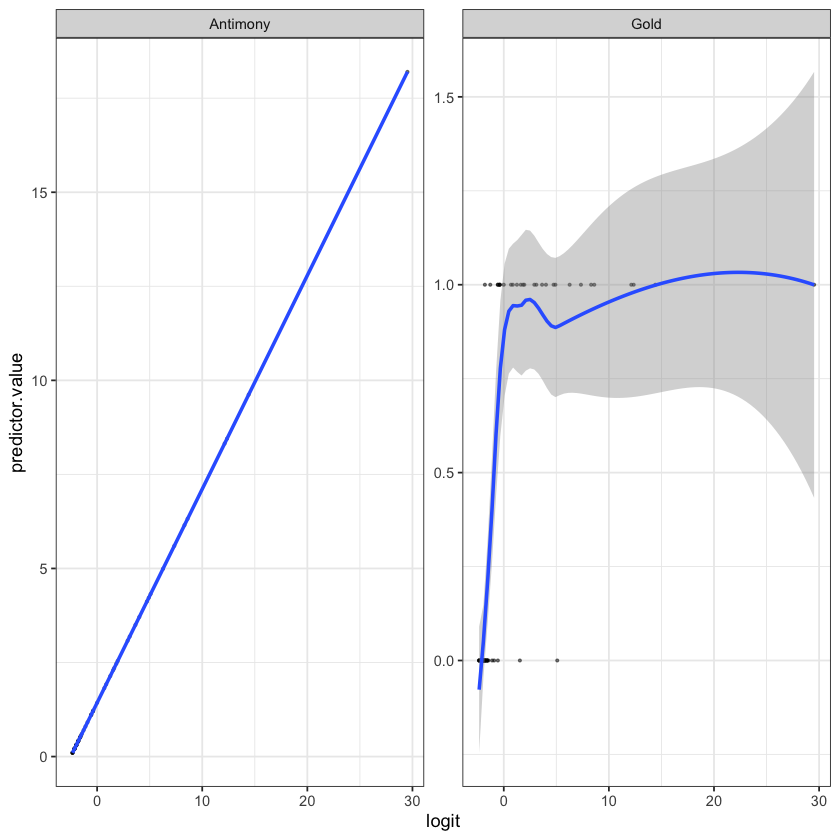

In [12]:
ggplot(minerals1, aes(logit, predictor.value))+
  geom_point(size=.5, alpha=.5)+
  geom_smooth(method="loess")+
  theme_bw()+
  facet_wrap(~predictors, scales="free_y")


	Durbin-Watson test

data:  myLogit
DW = 1.7616, p-value = 0.3316
alternative hypothesis: true autocorrelation is not 0


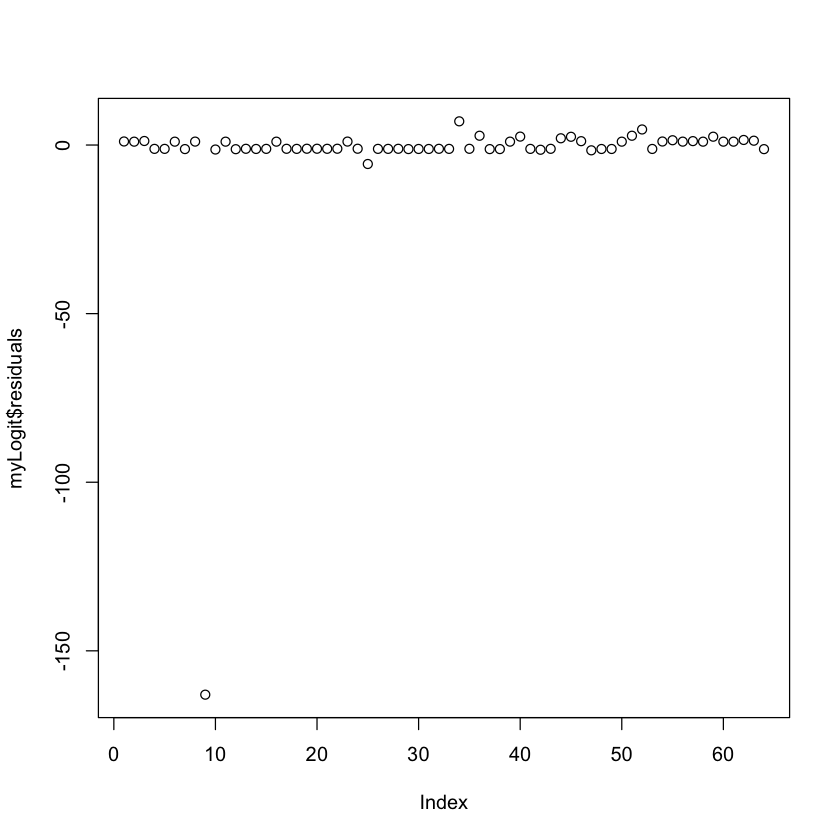

In [13]:
# Test for Independent Errors
plot(myLogit$residuals)
dwtest(myLogit, alternative="two.sided")

In [14]:
summary(myLogit)

#Testing this



Call:
glm(formula = Gold ~ Antimony, family = binomial, data = minerals)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1918  -0.5462  -0.4471   0.2447   1.9748  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.5184     0.5958  -4.227 2.37e-05 ***
Antimony      1.7606     0.4883   3.606 0.000311 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 87.720  on 63  degrees of freedom
Residual deviance: 45.332  on 62  degrees of freedom
AIC: 49.332

Number of Fisher Scoring iterations: 7
